# **SCORE: 1.5 points if all code functions correctly. 0 points if it does not (since the entire code is disclosed).**

## Exercise(1) Apply PCA algorithm

In [85]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print('... loading data')
with open('mnist.pkl', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

... loading data


In [86]:
train_x, train_y = train_set
test_x, test_y = test_set

train_x = pd.DataFrame(train_x)
train_y = pd.DataFrame(train_y, columns=['label'])
test_x = pd.DataFrame(test_x)
test_y = pd.DataFrame(test_y, columns=['label'])

In [87]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler()
# train_x = scaler.fit_transform(train_x)

In [88]:
from sklearn.decomposition import PCA


PCA_model = PCA(n_components = 2).fit(train_x)
PCA_train_x = PCA_model.transform(train_x)
PCA_test_x =  PCA_model.transform(test_x)

In [89]:
print('PCA_train_x shape: ', PCA_train_x.shape)
print('PCA_test_x shape: ', PCA_test_x.shape)

PCA_train_x shape:  (50000, 2)
PCA_test_x shape:  (10000, 2)


In [90]:
train_y.shape

(50000, 1)

Text(0, 0.5, 'Principal Component 2')

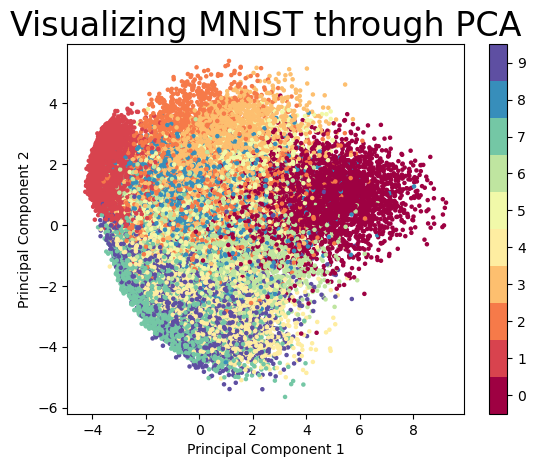

In [91]:
## Plot on the graph
plt.scatter(PCA_train_x[:, 0], PCA_train_x[:, 1], s=5, c=train_y['label'], cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

Text(0, 0.5, 'Principal Component 2')

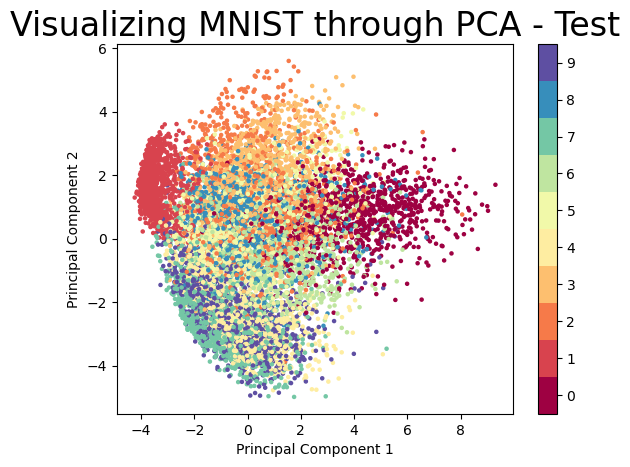

In [92]:
## Plot on the graph
plt.scatter(PCA_test_x[:, 0], PCA_test_x[:, 1], s=5, c=test_y['label'], cmap='Spectral')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))

plt.title('Visualizing MNIST through PCA - Test', fontsize=24);
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

#### Let's use part of train_x data

In [93]:
sub_PCA_train_x = PCA_train_x[:1000, :]
print('sub_PCA_train_x.shape: ', sub_PCA_train_x.shape)

sub_PCA_train_x.shape:  (1000, 2)


In [94]:
sub_PCA_test_x = PCA_test_x[:100, :]
print('sub_PCA_test_x.shape: ', sub_PCA_test_x.shape)

sub_PCA_test_x.shape:  (100, 2)


## Exercise(2) - Hierarchical Clustering

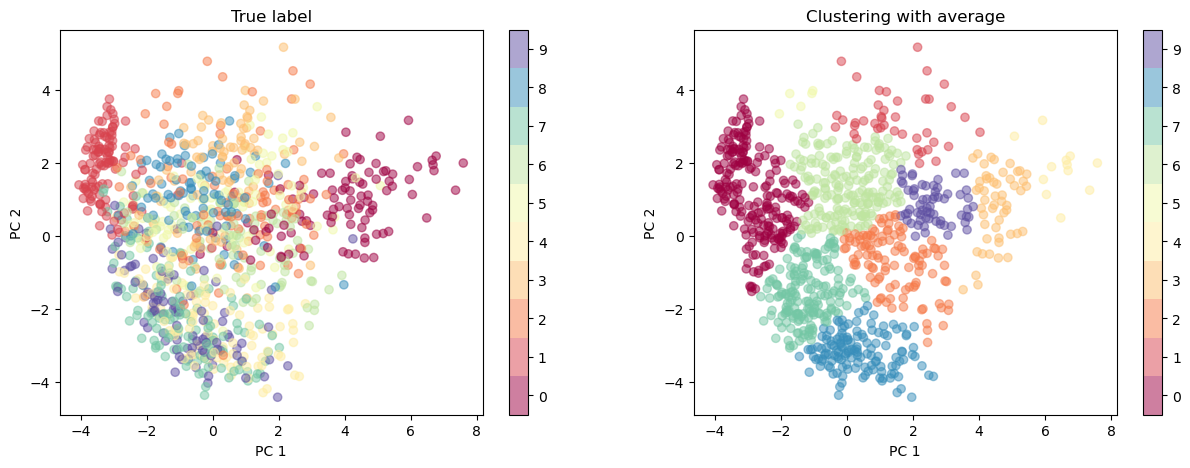

In [95]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
li = 'average' # linkage{‘ward’, ‘complete’, ‘average’, ‘single’}, default=’ward’
n_c = 10
hier = AgglomerativeClustering(n_clusters=n_c, metric ='euclidean', linkage=li)
pred_y = hier.fit_predict(sub_PCA_train_x)

## Plot
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], c=train_y['label'][:1000], cmap='Spectral', alpha=0.5)
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title("True label")
plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.subplot(1,2,2)
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:, 1], c=pred_y, cmap='Spectral', alpha=0.5)
plt.colorbar(boundaries=np.arange(n_c+1)-0.5).set_ticks(np.arange(n_c))
plt.title("Clustering with " + li)
plt.xlabel('PC 1'); plt.ylabel('PC 2')

plt.show()

----
## Exercise(3) k-means scratch
### Step(1) Normalize data

In [96]:
a = np.array([1, 3, 4])
A = np.tile(a, (3,1))
A

array([[1, 3, 4],
       [1, 3, 4],
       [1, 3, 4]])

k-means 클러스터링 알고리듬에 데이터를 제공하기 앞서 반드시 거쳐야하는 한 가지 중요한 작업은 데이터 내 여러 변수들의 변동폭(variations)을 일정하게 맞춰주는 것입니다. ML workflow 상에서는 이 과정을 **normalization** (정규화) 이라고 부릅니다.

여기서는 일반적으로 사용되는 두 가지 normalization 방법을 살펴보고자 합니다.
* min-max normalization
* mean-std normalization

다음의 함수들을 입력하여 data normalization을 할 수 있도록 준비합니다.

<h3>English below</h3>
Before providing data to the k-means clustering algorithm, an important step that must be performed is to adjust the variations (variations) of multiple variables in the data to a consistent scale. In machine learning workflows, this process is referred to as normalization.

Here, we will examine two commonly used normalization methods:
* min-max normalization
* mean-std normalization

Next, let's prepare the functions to perform data normalization.

In [97]:
def apply_normalizer(dataset, offset, divisor):
    dataset_normalized = np.zeros(dataset.shape)
    N = dataset.shape[0]
    dataset_normalized = dataset -np.tile(offset, (N,1))
    dataset_normalized = dataset_normalized / np.tile(divisor, (N,1))

    return dataset_normalized


def normalize_minmax(dataset):
    minval = dataset.min(0)
    maxval = dataset.max(0)

    dataset_normalized = apply_normalizer(dataset, minval, maxval-minval)

    return dataset_normalized, minval, maxval-minval


def normalize_meanstd(dataset):
    meanval = dataset.mean(0)
    stdval = dataset.std(0)

    dataset_normalized = apply_normalizer(dataset, meanval, stdval)

    return dataset_normalized, meanval, stdval

In [98]:
normalized_PCA_train_x, off, div = normalize_minmax(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div, '\n')

normalized_PCA_train_x, off, div = normalize_meanstd(sub_PCA_train_x)
print("Original data: ", sub_PCA_train_x[0], '\nNormalized data: ', normalized_PCA_train_x[0])
print("offset:", off, ";  divisor:", div)

Original data:  [0.46150947 1.2468646 ] 
Normalized data:  [0.38819653 0.59081835]
offset: [-4.060648 -4.411341] ;  divisor: [11.649145  9.576897] 

Original data:  [0.46150947 1.2468646 ] 
Normalized data:  [0.24438621 0.6387501 ]
offset: [-0.07587952  0.00492721] ;  divisor: [2.1989334 1.9443245]


/var/folders/dy/7xnphd255c182883n0twgwgm0000gn/T/ipykernel_90256/8907497.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(normalized_PCA_train_x[:, 0], normalized_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)


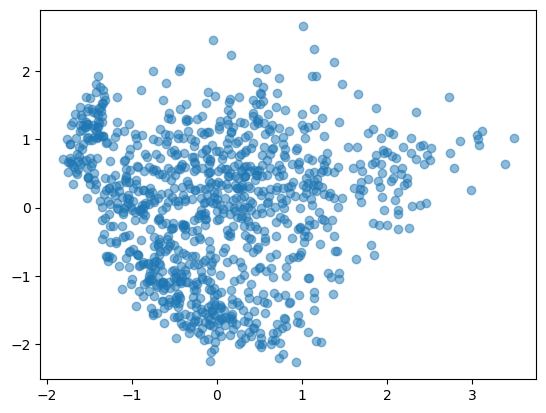

In [99]:
plt.scatter(normalized_PCA_train_x[:, 0], normalized_PCA_train_x[:, 1], cmap='Spectral', alpha=0.5)

**Q1: 두 가지 normalization 방법에 대하여 각각 offset과 divisor가 갖는 의미가 무엇인가요?**

**Q2: 두 가지 normalization 방법에 대하여 각각, normalize 후에는 데이터의 범위가 어떻게 변하나요?**

<h3>English below</h3>

**Q1: What do the offset and divisor mean for each of the two normalization methods?**

**Q2: After normalization, how does the range of the data change for each method?**

Hint: np.mean(X_normalized, axis=0), np.std(X_normalized, axis=0), np.min(X_normalized, axis=0), np.max(X_normalized, axis=0), np.median(X_normalized, axis=0) 등의 함수를 사용해보세요.

### Step(2). Initialize centroids

In [100]:
k = int(input("How many cluster do you want? "))
print(k)

10


In [101]:
import random

def random_initialize_centroids(centroids, dataset, k):
    init_centroids = random.sample(range(0,len(dataset)),k)

    for i, c in enumerate(init_centroids):
        centroids[i] = dataset[c]

In [102]:
def initialize_centroids(k, centroids, dataset):
    for i in range(k):  # first k instances become the initial centroids
        centroids[i] = dataset[i]

In [103]:
centroids = {}

# initialize_centroids(centroids, sub_PCA_train_x)
random_initialize_centroids(centroids, sub_PCA_train_x, k)

In [104]:
cet_df = pd.DataFrame(centroids).transpose()
cet_df.columns = ['X', 'Y']
cet_df.head()

X         Y
0  0.354316 -2.098850
1 -2.486400  0.002632
2  2.438000 -2.577375
3  2.637985 -0.330712
4 -2.242558  0.569719

In [105]:
type(sub_PCA_train_x)

numpy.ndarray

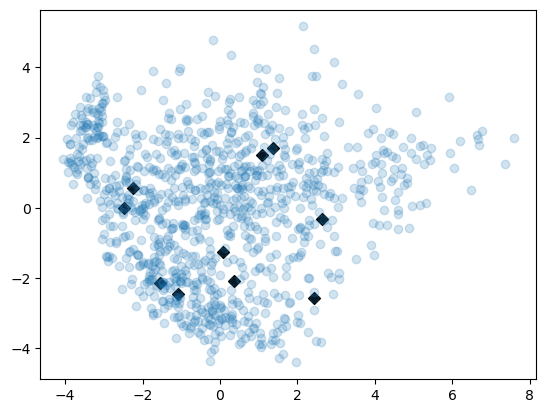

In [106]:
plt.figure()
plt.scatter(cet_df['X'], cet_df['Y'], color='black', marker='D')
plt.scatter(sub_PCA_train_x[:, 0], sub_PCA_train_x[:,1], alpha=0.2)

### Step(3). (Re)assigning every datas to its _closest centroid_

In [116]:
# a distance function
def Euclidean_distance(vecA, vecB):
    return np.sqrt(sum(np.power([a-b for a, b in zip(vecA,vecB)],2)))

def re_assign_data(dataset, centroids, cluster_memberships):
    # (Re)assigning every instance to its closest centroid
    for row in dataset:
        # Calculate euclidean distance between each centroid and each data.
        distances_to_centroids = [Euclidean_distance(row,centroids[centroid]) for centroid in centroids]

        # Find the centroid with a minimum distance
        membership = distances_to_centroids.index(min(distances_to_centroids))
        cluster_memberships[membership].append(row)

### Step(4). Recalculate average of each cluster and calculate SSE value

In [117]:
def re_calc_avg_calc_sse(curr_sse, cluster_memberships, centroids):
    # Re-calculate the average of each cluster and calculate SSE.
    for membership in cluster_memberships:
        centroids[membership] = np.average(cluster_memberships[membership], axis=0)

        for row in cluster_memberships[membership]:
            curr_sse += np.power(Euclidean_distance(row, centroids[membership]),2)

    return curr_sse

### Step(5). Iterate STEP3 and STEP4 until SSE is less than ‘tol’ value


In [119]:
## k-Means algorithm
def kmeans(dataset, k, max_iter = 300, tol = 0.001):

    print('k is ', k)
    centroids = {}
    initialize_centroids(k, centroids, dataset)

    ## 1. Initiate SSE which is key metric in k-means clustering (sse = sum of squared error) into 'np.inf'
    curr_sse = np.inf

    ## 2. Clustering
    for i in range(max_iter):
        cluster_memberships = {}

        ## Initiate cluster memberships
        for j in range(k):
            cluster_memberships[j] = []

        ## (Re)Aassign datas to its closest centroids
        re_assign_data(dataset,centroids, cluster_memberships)

        prev_sse = curr_sse
        curr_sse = 0

        ## Re-calculate the average of each cluster and calculate SSE.
        curr_sse = re_calc_avg_calc_sse(curr_sse, cluster_memberships, centroids)

        ## Plot center points
        plt.figure(i)
        c_df = pd.DataFrame(centroids).transpose()
        plt.scatter(c_df.loc[:,0], c_df.loc[:,1],color='black', marker='x')

        ## Plot assigned data
        for key in cluster_memberships:
            plt.scatter(*zip(*cluster_memberships[key]), alpha=0.2)
            plt.title('k={}'.format(k) + ' SSE='+ str(curr_sse))

        plt.show()

        print('iteration#{} | prev_sse= {:.4f};  curr_sse= {:.4f}'.format(i, prev_sse,curr_sse))
        if(prev_sse - curr_sse) / curr_sse < tol:
            break
    return cluster_memberships, curr_sse

**Q3: 함수의 초기값들을 살펴보세요. 위 함수가 시작할 때 centroids는 어떻게 지정되나요?**

**Q4: k-Means 알고리듬의 핵심 작동 원리는 (1) 근거리 우선을 원칙으로 하는 cluster 배정과 (2) 배정된 cluster members로부터 centroid를 새로 지정하는 과정을 반복하는 것에 있습니다. 위 함수에서 (1)과 (2)에 해당하는 부분이 각각 어디에 있나요?**

**Q5: 클러스터링의 품질을 나타내는 한 가지 척도(metric)는 sum of squared error (SSE) 이며, 위의 코드에서 curr_sse에 해당합니다. SSE가 같는 의미를 data와 centroids 관점에서 설명해보세요. SSE는 클수록 좋을까요, 작을수록 좋을까요?**

**Q6: 위 코드가 수행을 종료하는 기준은 무엇인가요? 변수 `tol`과 `max_iter`를 기준으로 설명해보세요.**

<h3>English below</h3>

**Q3: Let's look at the initial values. How are the centroids assigned at the beginning of the function?**

**Q4: The core working principle of the k-means algorithm is (1) assigning clusters based on proximity and (2) reassigning centroids based on the assigned cluster members. Where are these processes located in the function?**

**Q5: One metric that indicates the quality of clustering is the sum of squared error (SSE), which is represented by curr_sse in the code. What does SSE mean from the perspective of the data and centroids? Should SSE be larger or smaller for better clustering?**

**Q6: What is the termination criterion for the algorithm in the code? Explain based on the `tol` and `max_iter` variables.**

k is  10


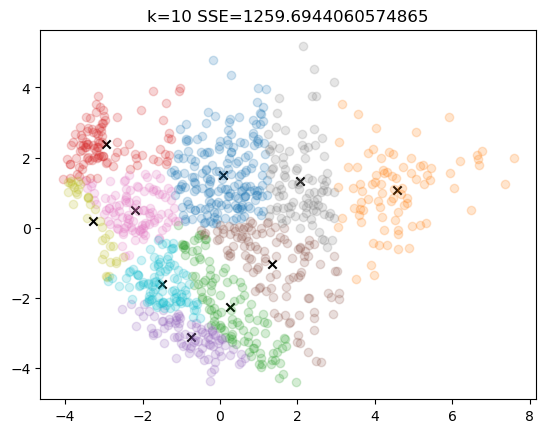

iteration#0 | prev_sse= inf;  curr_sse= 1259.6944


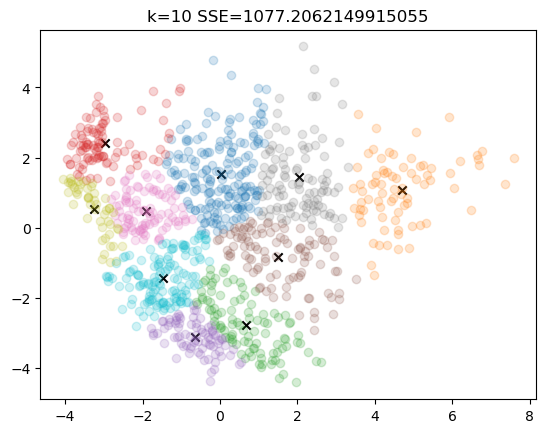

iteration#1 | prev_sse= 1259.6944;  curr_sse= 1077.2062


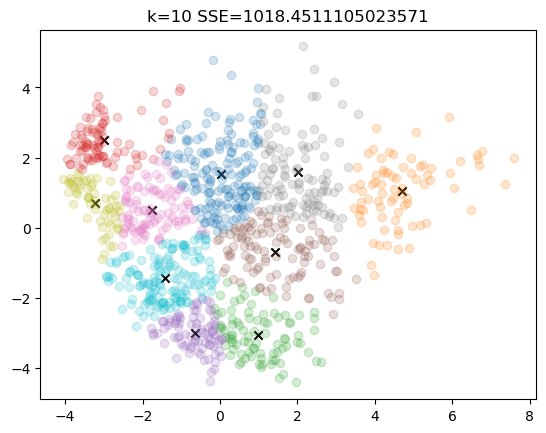

iteration#2 | prev_sse= 1077.2062;  curr_sse= 1018.4511


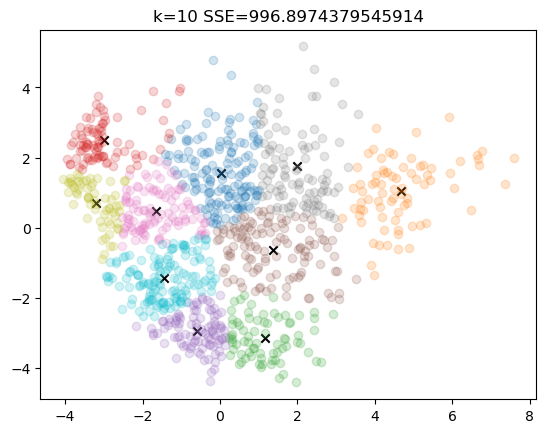

iteration#3 | prev_sse= 1018.4511;  curr_sse= 996.8974


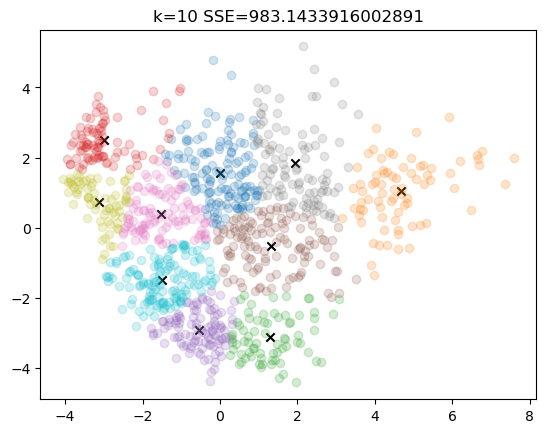

iteration#4 | prev_sse= 996.8974;  curr_sse= 983.1434


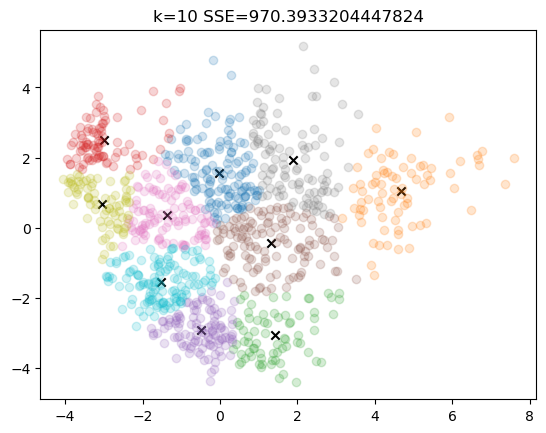

iteration#5 | prev_sse= 983.1434;  curr_sse= 970.3933


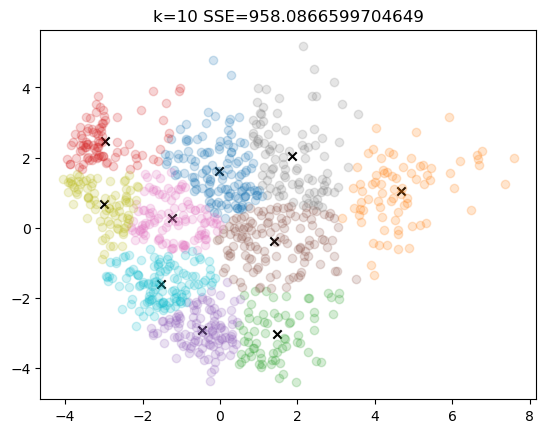

iteration#6 | prev_sse= 970.3933;  curr_sse= 958.0867


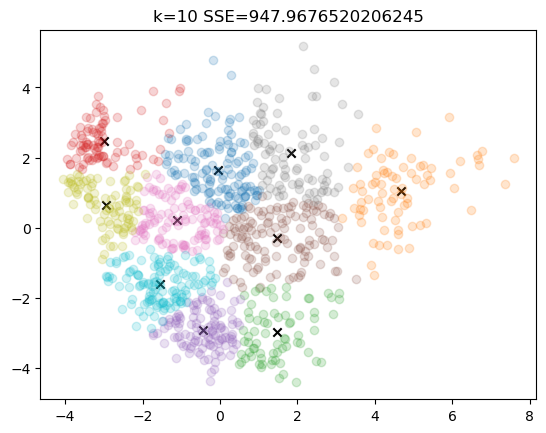

iteration#7 | prev_sse= 958.0867;  curr_sse= 947.9677


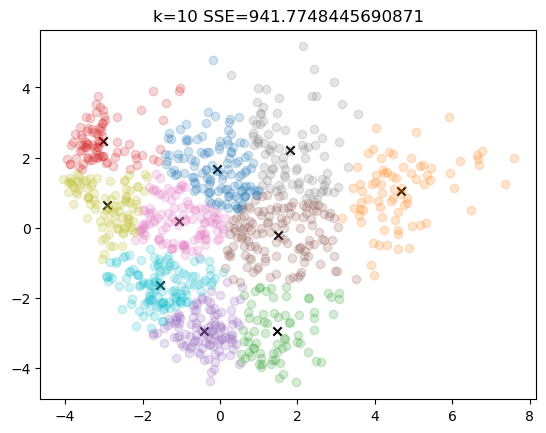

iteration#8 | prev_sse= 947.9677;  curr_sse= 941.7748


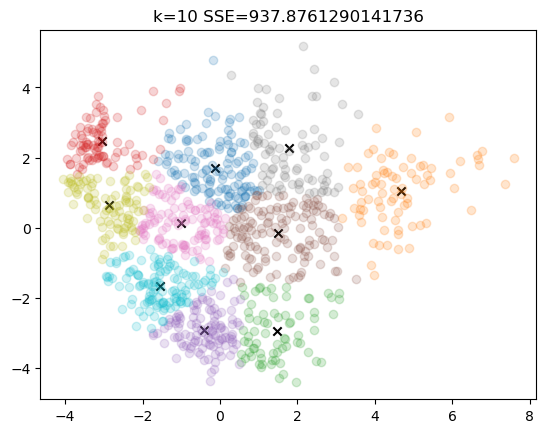

iteration#9 | prev_sse= 941.7748;  curr_sse= 937.8761


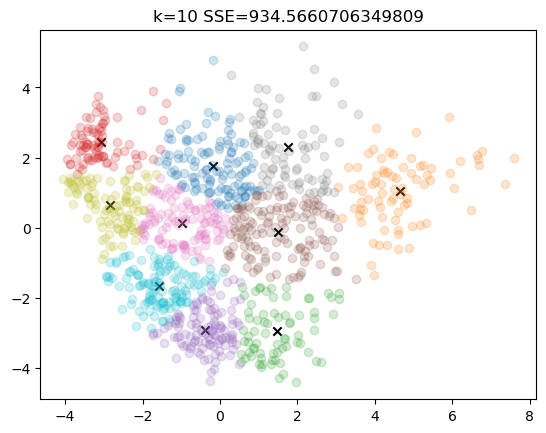

iteration#10 | prev_sse= 937.8761;  curr_sse= 934.5661


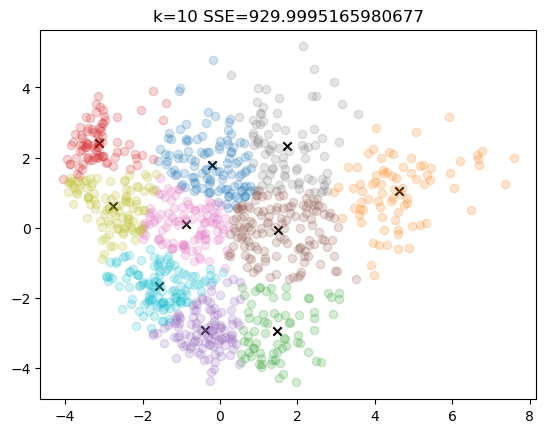

iteration#11 | prev_sse= 934.5661;  curr_sse= 929.9995


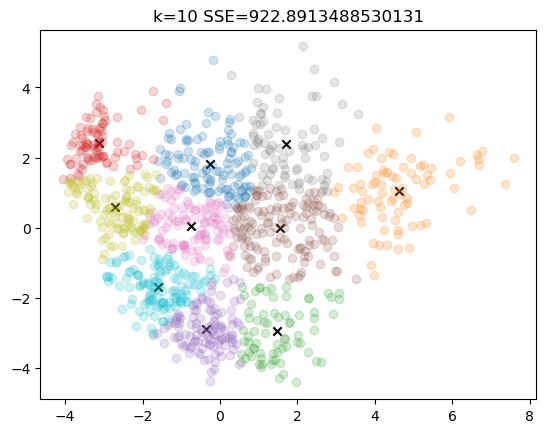

iteration#12 | prev_sse= 929.9995;  curr_sse= 922.8913


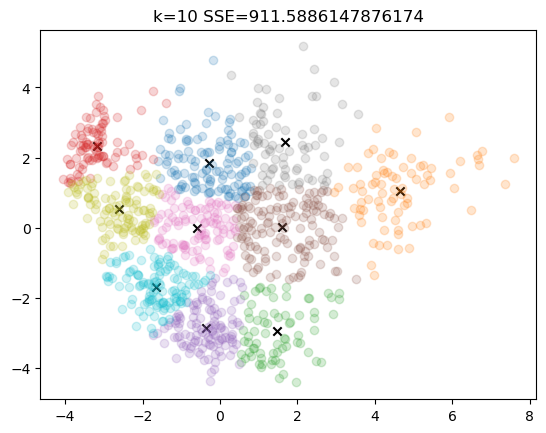

iteration#13 | prev_sse= 922.8913;  curr_sse= 911.5886


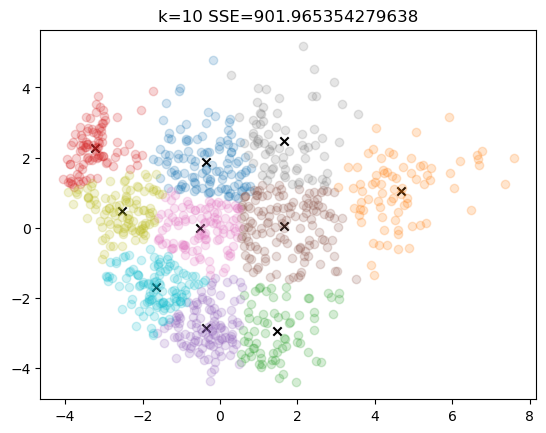

iteration#14 | prev_sse= 911.5886;  curr_sse= 901.9654


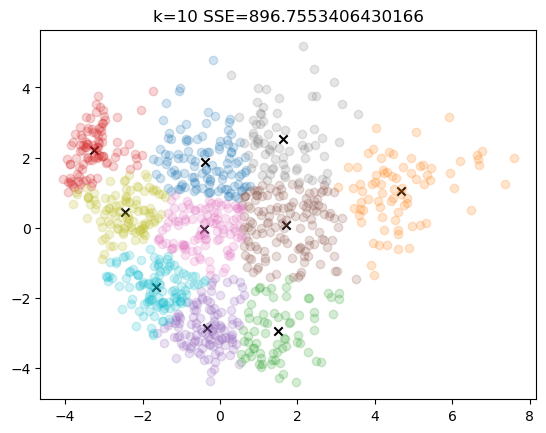

iteration#15 | prev_sse= 901.9654;  curr_sse= 896.7553


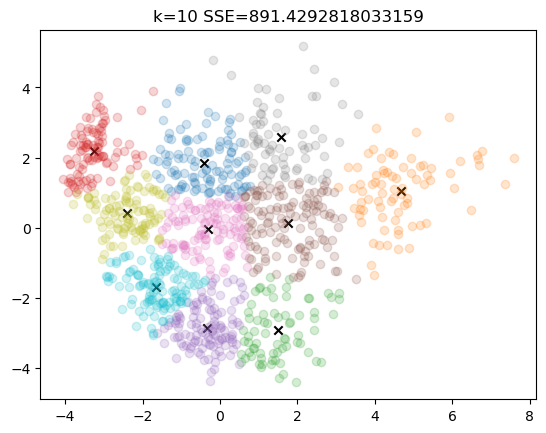

iteration#16 | prev_sse= 896.7553;  curr_sse= 891.4293


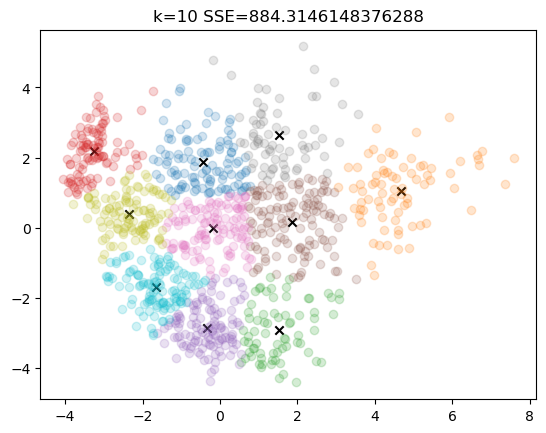

iteration#17 | prev_sse= 891.4293;  curr_sse= 884.3146


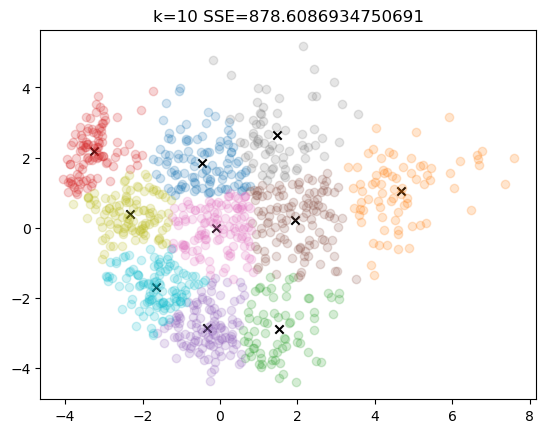

iteration#18 | prev_sse= 884.3146;  curr_sse= 878.6087


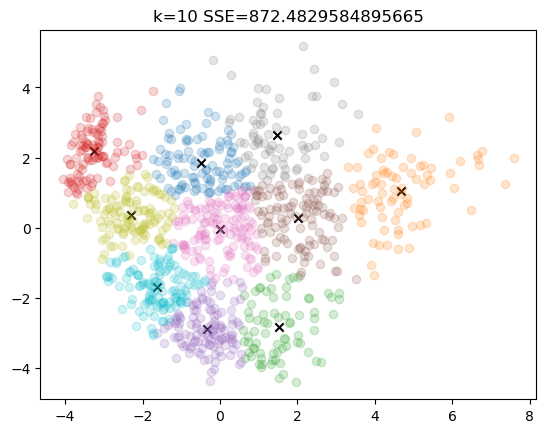

iteration#19 | prev_sse= 878.6087;  curr_sse= 872.4830


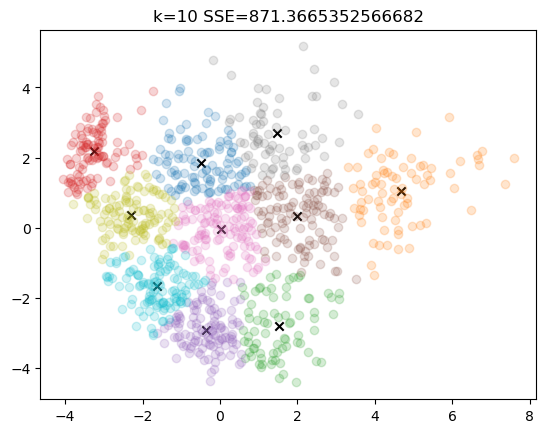

iteration#20 | prev_sse= 872.4830;  curr_sse= 871.3665


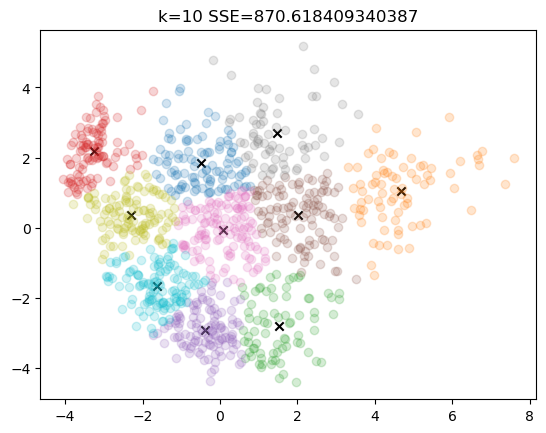

iteration#21 | prev_sse= 871.3665;  curr_sse= 870.6184


In [120]:
cluster_memberships, curr_sse = kmeans(sub_PCA_train_x, k)

----
### Step(6) Using sklearn library
- ___KMeans(n_clusters=)___

In [122]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=k)
model.fit(PCA_train_x)

result = model.predict(PCA_test_x)

- Check ___crosstab___

In [123]:
import pandas as pd

df = pd.DataFrame({'labels': test_y['label'], 'result': result})
ct = pd.crosstab(df['labels'],  df['result'])
ct

result    0    1    2    3    4    5    6    7    8    9
labels                                                  
0       344    2    0    0  493   16    1    4   58   62
1         0  120    0  985    0    1    0   28    0    1
2       181   78   22   27   23  204    7  255   18  217
3        58   79   11   11    7  420    2  314    3  105
4         1  107  364    3    1    0  364    1  115   26
5       173  142   46    9   17  110   10   94   28  263
6       168   64   34   10   29   15   16   79  219  324
7         0  150  475   14    0    1  318   12   32   26
8        97  100   37   12   34   59   13  289   32  301
9         5   90  404    4    6    0  400    2   72   26